<a href="https://colab.research.google.com/github/YirenShen-07/Final-Project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Final Project
### Built an interactive web application based on Streamlit with the main functions of market trend forecasting and customer behavior analysis. Goal: Provide data cleansing, customer analytics, time series analysis, product analytics and interpretable AI (XAI) insights to help companies optimize their decision making.
### Yiren Shen

#### Include the button below. Change the link to the location in your github repository:https://github.com/YirenShen-07/Final-Project/blob/main/FinalProject.ipynb

In [1]:
import csv
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data="/content/drive/MyDrive/Electronic_sales_Sep2023-Sep2024.csv"
data=pd.read_csv(data)
data

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [3]:
import pandas as pd
# 1. Data Cleaning
data_cleaned = data.copy()

# Handle missing values
data_cleaned['Add-ons Purchased'].fillna('None', inplace=True)
data_cleaned['Add-on Total'].fillna(0, inplace=True)

# Convert date format
data_cleaned['Purchase Date'] = pd.to_datetime(data_cleaned['Purchase Date'], errors='coerce')

# Remove invalid dates
data_cleaned = data_cleaned[data_cleaned['Purchase Date'].notnull()]

# Standardize categorical fields
data_cleaned['Order Status'] = data_cleaned['Order Status'].str.capitalize()
data_cleaned['Payment Method'] = data_cleaned['Payment Method'].str.capitalize()
data_cleaned['Shipping Type'] = data_cleaned['Shipping Type'].str.capitalize()

<ipython-input-3-6044a3802302>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Add-ons Purchased'].fillna('None', inplace=True)
<ipython-input-3-6044a3802302>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

# 3D Sales Terrain Generation

In [4]:
!pip install numpy-stl

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from stl import mesh

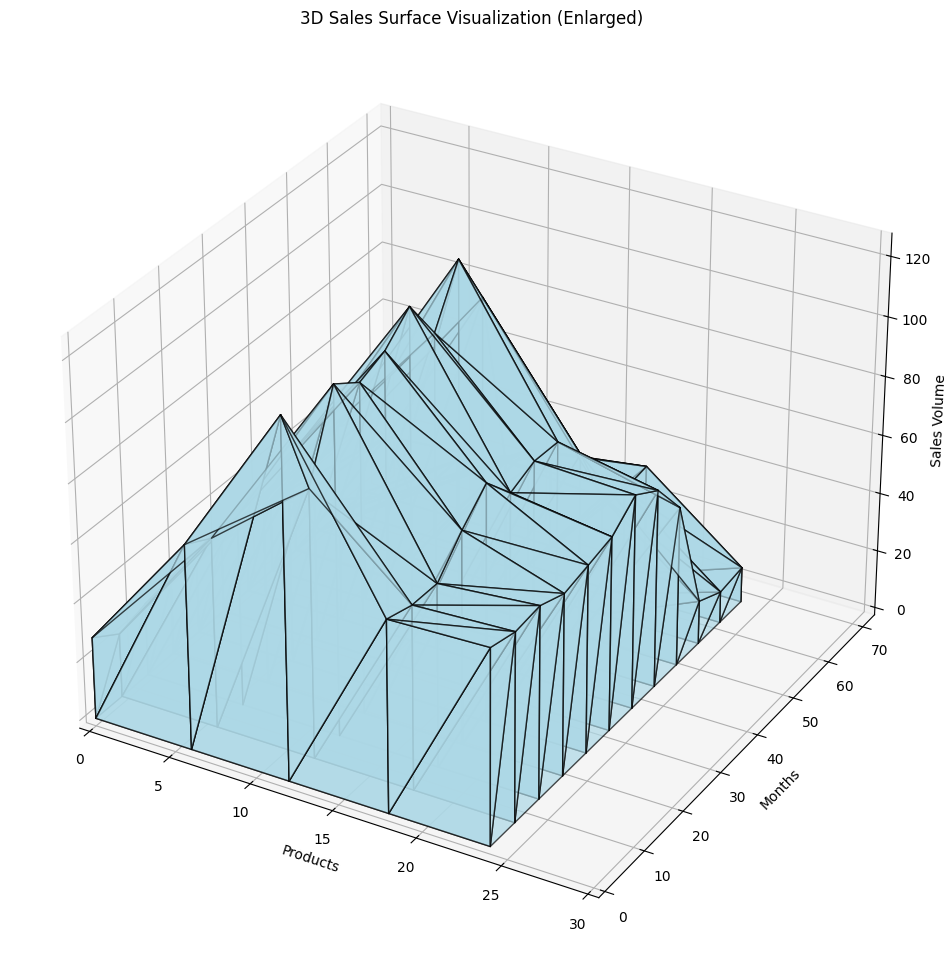

In [6]:
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1. Create monthly sales pivot
monthly_sales = data_cleaned.pivot_table(
    values='Total Price',
    index=['Product Type'],
    columns=pd.to_datetime(data_cleaned['Purchase Date']).dt.month,
    aggfunc='sum'
).fillna(0)

# 2. Normalize data for 3D printing scale
max_height = 50  # Maximum height in mm
normalized_data = (monthly_sales - monthly_sales.min().min()) / \
                 (monthly_sales.max().max() - monthly_sales.min().min()) * max_height

# 3. Define scale factors - significantly increased
x_scale = 6.0  # Increased from 1.5
y_scale = 6.0  # Increased from 1.5
z_scale = 2.5  # Increased from 0.5 and made relatively larger

# 4. Create vertices and faces for 3D mesh
x_len, y_len = normalized_data.shape
vertices = []
faces = []

# Create vertices for surface
for x in range(x_len):
    for y in range(y_len):
        # Add vertex at current position with height from data
        vertices.append([
            x * x_scale,
            y * y_scale,
            normalized_data.iloc[x, y] * z_scale
        ])
        # Add vertex at bottom (z=0) for the same x,y position
        vertices.append([
            x * x_scale,
            y * y_scale,
            0
        ])

# Create triangular faces to form a continuous surface
for x in range(x_len - 1):
    for y in range(y_len - 1):
        # Calculate vertex indices
        top_left = 2 * (x * y_len + y)
        top_right = 2 * (x * y_len + y + 1)
        bottom_left = 2 * ((x + 1) * y_len + y)
        bottom_right = 2 * ((x + 1) * y_len + y + 1)

        # Create two triangles for top surface with consistent orientation
        faces.append([top_left, bottom_left, bottom_right])
        faces.append([top_left, bottom_right, top_right])

        # Create vertical faces to connect to ground
        faces.append([top_left, top_left + 1, bottom_left])
        faces.append([bottom_left, top_left + 1, bottom_left + 1])
        faces.append([top_right, top_right + 1, bottom_right])
        faces.append([bottom_right, top_right + 1, bottom_right + 1])

# Create triangular faces for front and back walls
for x in range(x_len - 1):
    # Front wall
    v1 = 2 * x * y_len
    v2 = 2 * (x + 1) * y_len
    faces.append([v1, v1 + 1, v2])
    faces.append([v2, v1 + 1, v2 + 1])

    # Back wall
    v1 = 2 * (x * y_len + y_len - 1)
    v2 = 2 * ((x + 1) * y_len + y_len - 1)
    faces.append([v1, v2, v1 + 1])
    faces.append([v2, v2 + 1, v1 + 1])

# Create triangular faces for sides
for y in range(y_len - 1):
    # Left side
    v1 = 2 * y
    v2 = 2 * (y + 1)
    faces.append([v1, v1 + 1, v2])
    faces.append([v2, v1 + 1, v2 + 1])

    # Right side
    v1 = 2 * ((x_len - 1) * y_len + y)
    v2 = 2 * ((x_len - 1) * y_len + y + 1)
    faces.append([v1, v2, v1 + 1])
    faces.append([v2, v2 + 1, v1 + 1])

# Create the mesh
vertices = np.array(vertices)
faces = np.array(faces)

solid_mesh = mesh.Mesh(np.zeros(len(faces), dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        solid_mesh.vectors[i][j] = vertices[f[j]]

# Save the 3D model
solid_mesh.save('larger_surface_3d.stl')

# Preview the model
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

triangles = []
for face in faces:
    triangles.append([vertices[face[0]], vertices[face[1]], vertices[face[2]]])

poly3d = Poly3DCollection(triangles, alpha=0.7, edgecolor='k', facecolor='lightblue')
ax.add_collection3d(poly3d)

ax.set_xlim([0, x_len * x_scale])
ax.set_ylim([0, y_len * y_scale])
ax.set_zlim([0, max_height * z_scale])
ax.set_xlabel('Products')
ax.set_ylabel('Months')
ax.set_zlabel('Sales Volume')
plt.title('3D Sales Surface Visualization (Enlarged)')
plt.show()

**Explanation**

show_3d_visualization function uses a monthly sales data pivot table, the product type, month and sales mapped to three-dimensional space. This three-dimensional display allows users to visualize the time trend of product sales.

This feature provides a new perspective on the data. Unlike traditional 2D charts, 3D charts show the relationship between product type, time and sales in three dimensions simultaneously. This is especially helpful in identifying complex sales patterns.

This module converts sales data into a three-dimensional chart:

* X-axis: represents product type
* Y-axis: represents time (month)
* Z-axis: represents sales

Through the form of surface diagram to show the three-dimensional data relationships

In [7]:
from google.colab import files
files.download('larger_surface_3d.stl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Explanation**

This code can export stl models for 3d printing.

#Steamlit

In [8]:
!pip install lime==0.2.0.1 dtreeviz pdpbox

In [9]:
!pip install streamlit

In [10]:
!pip install pyngrok

In [11]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 1s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠧

In [12]:
!pip install prophet

## Create App

In [13]:
# Create app.py file
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lime import lime_tabular
from sklearn.tree import DecisionTreeClassifier, plot_tree
import dtreeviz
import io
from prophet import Prophet

def main():
    st.title('Market Trend Forecasting & Customer Behavior Analysis')

    # Sidebar navigation
    st.sidebar.title('Navigation')
    analysis_type = st.sidebar.selectbox(
        'Select Analysis',
        ['Data Overview', 'Customer Analysis', 'Time Series Analysis',
         'Product Analysis', 'XAI Insights', '3D Visualization']
    )

    # File upload
    uploaded_file = st.file_uploader("Upload Electronic Sales Data CSV", type=['csv'])

    if uploaded_file is not None:
        data = pd.read_csv(uploaded_file)

        # Data cleaning
        data_cleaned = clean_data(data)

        if analysis_type == 'Data Overview':
            show_data_overview(data_cleaned)
        elif analysis_type == 'Customer Analysis':
            show_customer_analysis(data_cleaned)
        elif analysis_type == 'Time Series Analysis':
            show_time_series_analysis(data_cleaned)
        elif analysis_type == 'Product Analysis':
            show_product_analysis(data_cleaned)
        elif analysis_type == 'XAI Insights':
            show_xai_insights(data_cleaned)
        else:
            show_3d_visualization(data_cleaned)

def clean_data(data):
    data_cleaned = data.copy()

    # Handle missing values
    data_cleaned['Add-ons Purchased'].fillna('None', inplace=True)
    data_cleaned['Add-on Total'].fillna(0, inplace=True)

    # Convert date format
    data_cleaned['Purchase Date'] = pd.to_datetime(data_cleaned['Purchase Date'])

    # Standardize categorical fields
    data_cleaned['Order Status'] = data_cleaned['Order Status'].str.capitalize()
    data_cleaned['Payment Method'] = data_cleaned['Payment Method'].str.capitalize()
    data_cleaned['Shipping Type'] = data_cleaned['Shipping Type'].str.capitalize()

    # Remove duplicates
    data_cleaned.drop_duplicates(inplace=True)

    return data_cleaned

def show_data_overview(data):
    st.header('Data Overview')

    # Display data and statistics side by side
    col1, col2 = st.columns(2)

    with col1:
        st.subheader('Sample Data')
        st.dataframe(data.head())

    with col2:
        st.subheader('Summary Statistics')
        st.dataframe(data.describe())

        st.subheader('Date Range')
        st.write(f"Start Date: {data['Purchase Date'].min()}, End Date: {data['Purchase Date'].max()}")

    # Add interactive filters
    st.subheader('Data Filter')
    product_types = st.multiselect('Select Product Type(s):', options=data['Product Type'].unique(), default=data['Product Type'].unique())
    payment_methods = st.multiselect('Select Payment Method(s):', options=data['Payment Method'].unique(), default=data['Payment Method'].unique())

    filtered_data = data[
        (data['Product Type'].isin(product_types)) &
        (data['Payment Method'].isin(payment_methods))
    ]
    st.write(f"Filtered Data ({len(filtered_data)} rows):")
    st.dataframe(filtered_data)

    # Visualize product type distribution
    st.subheader('Product Type Distribution')
    product_distribution = filtered_data['Product Type'].value_counts()
    st.bar_chart(product_distribution)

def show_customer_analysis(data):
    st.header('Customer Analysis')

    # Create customer features with flattened column names
    customer_features = data.groupby('Customer ID').agg({
        'Total Price': ['sum', 'mean', 'count', 'std'],
        'Rating': ['mean', 'min', 'max', 'count'],
        'Age': 'first',
        'Gender': 'first',
        'Loyalty Member': lambda x: x.iloc[-1],
        'Purchase Date': ['min', 'max']
    })

    # Flatten column names
    customer_features.columns = ['Total_Spend', 'Avg_Transaction',
                               'Transaction_Count', 'Spend_Std',
                               'Avg_Rating', 'Min_Rating', 'Max_Rating',
                               'Rating_Count', 'Age', 'Gender',
                               'Current_Loyalty', 'First_Purchase',
                               'Last_Purchase']

    # Select only numeric columns for correlation
    numeric_cols = ['Total_Spend', 'Avg_Transaction', 'Transaction_Count',
                   'Spend_Std', 'Avg_Rating', 'Min_Rating', 'Max_Rating',
                   'Rating_Count', 'Age']

    # Show correlation heatmap
    st.subheader('Feature Correlation Heatmap')
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(customer_features[numeric_cols].corr(), annot=True, cmap='coolwarm')
    st.pyplot(fig)

    # Consumption Time Trend
    st.subheader('Customer Behavior Trends')
    customer_trends = data.groupby(data['Purchase Date'].dt.to_period('M'))['Total Price'].sum().reset_index()
    customer_trends['Purchase Date'] = customer_trends['Purchase Date'].astype(str)

    fig = px.line(customer_trends, x='Purchase Date', y='Total Price', title='Customer Spending Trends Over Time')
    st.plotly_chart(fig)

    # Customer Loyalty Analysis
    st.subheader('Customer Loyalty Analysis')
    repeat_customers = data.groupby('Customer ID').filter(lambda x: len(x) > 1)['Customer ID'].nunique()
    total_customers = data['Customer ID'].nunique()
    st.metric('Repeat Customers Rate', f"{repeat_customers / total_customers:.2%}")

    # High-value Customer Identification
    st.subheader('High Value Customers')
    threshold = data.groupby('Customer ID')['Total Price'].sum().quantile(0.9)
    high_value_customers = data.groupby('Customer ID').filter(lambda x: x['Total Price'].sum() > threshold)

    st.write(f"Number of High-Value Customers: {high_value_customers['Customer ID'].nunique()}")
    high_value_summary = high_value_customers.groupby('Customer ID').agg({'Total Price': 'sum', 'Purchase Date': 'count'}).reset_index()
    st.dataframe(high_value_summary)

    # Customer Buying Preference Analysis
    st.subheader('Customer Purchase Preferences')
    purchase_prefs = data.groupby(['Gender', 'Product Type'])['Total Price'].sum().reset_index()
    fig = px.bar(purchase_prefs, x='Product Type', y='Total Price', color='Gender', title='Spending by Product Type and Gender')
    st.plotly_chart(fig)

def show_time_series_analysis(data):
    st.header('Time Series Analysis')

    data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

    # Date-indexed and resampled to daily frequency (fill missing values to 0)
    daily_sales = data.groupby('Purchase Date')['Total Price'].sum()
    daily_sales = daily_sales.asfreq('D', fill_value=0)  # Ensure data continuity

    # Daily Sales Trend
    st.subheader('Daily Sales Trend with Rolling Average')
    daily_sales_df = daily_sales.reset_index()
    daily_sales_df['Rolling_Mean'] = daily_sales_df['Total Price'].rolling(window=7).mean()

    fig = px.line(daily_sales_df, x='Purchase Date', y=['Total Price', 'Rolling_Mean'],
                  labels={'value': 'Sales'}, title='Daily Sales with Rolling Average')
    st.plotly_chart(fig)

    # Seasonal Decomposition
    st.subheader('Seasonal Decomposition')
    decomposition = seasonal_decompose(daily_sales, model='additive')  # Pass in the processed daily_sales

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    st.pyplot(fig)

    # Time Series Forecast
    st.subheader('Sales Forecasting')
    sales_prophet = daily_sales.reset_index().rename(columns={'Purchase Date': 'ds', 'Total Price': 'y'})
    model = Prophet()
    model.fit(sales_prophet)

    # Creating future date ranges
    future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days
    forecast = model.predict(future)

    fig = model.plot(forecast)
    st.pyplot(fig)

def show_product_analysis(data):
    st.header('Product Analysis')

    # Product performance metrics
    product_analysis = data.groupby('Product Type').agg({
        'Total Price': 'sum',
        'Rating': 'mean',
        'SKU': 'count'
    }).reset_index()

    # Interactive visualizations
    metric = st.selectbox('Select Metric:',
                         ['Total Price', 'Rating', 'SKU'])

    fig = px.bar(product_analysis, x='Product Type', y=metric,
                 title=f'Product Performance by {metric}')
    st.plotly_chart(fig)

def show_xai_insights(data):
    st.header('XAI Insights')
    try:
        # Create customer features
        customer_features = data.groupby('Customer ID').agg({
            'Total Price': ['sum', 'mean', 'count', 'std'],
            'Rating': ['mean', 'min', 'max', 'count'],
            'Age': 'first',
            'Purchase Date': ['min', 'max']
        }).reset_index()

        # Flatten column names
        customer_features.columns = ['Customer_ID', 'Total_Spend', 'Avg_Transaction',
                                   'Transaction_Count', 'Spend_Std', 'Avg_Rating',
                                   'Min_Rating', 'Max_Rating', 'Rating_Count',
                                   'Age', 'First_Purchase', 'Last_Purchase']

        # Calculate time-based features
        customer_features['Customer_Lifetime_Days'] = (
            pd.to_datetime(customer_features['Last_Purchase']) -
            pd.to_datetime(customer_features['First_Purchase'])
        ).dt.days

        # Calculate purchase frequency
        customer_features['Purchase_Frequency'] = (
            customer_features['Transaction_Count'] /
            (customer_features['Customer_Lifetime_Days'] + 1)
        )

        # Select features for clustering
        cluster_features = ['Total_Spend', 'Transaction_Count', 'Avg_Rating',
                          'Age', 'Purchase_Frequency', 'Customer_Lifetime_Days']
        X = customer_features[cluster_features]

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Perform clustering
        n_clusters = st.slider('Select number of clusters:', 2, 8, 4)

        with st.spinner('Performing clustering and SHAP analysis...'):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

            # SHAP Analysis
            st.subheader('SHAP Analysis')
            background = shap.kmeans(X_scaled, 10)  # Create background distribution
            explainer = shap.KernelExplainer(kmeans.predict, background)
            shap_values = explainer.shap_values(X_scaled)

            # SHAP visualization
            fig, ax = plt.subplots(figsize=(10, 6))
            shap.summary_plot(
                shap_values,
                X_scaled,
                feature_names=cluster_features,
                show=False
            )
            plt.title('Feature Importance in Customer Segmentation')
            plt.tight_layout()
            st.pyplot(fig)

            # LIME Analysis
            st.subheader('LIME Analysis')

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, customer_features['Cluster'],
                test_size=0.2, random_state=42
            )

            # Create decision tree model
            dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
            dt_model.fit(X_train, y_train)

            # Create LIME explainer
            lime_explainer = lime_tabular.LimeTabularExplainer(
                X_train,
                feature_names=cluster_features,
                class_names=[f'Cluster {i}' for i in range(n_clusters)],
                mode='classification'
            )

            # Sample explanation
            st.write("Sample Customer LIME Explanation:")
            exp = lime_explainer.explain_instance(
                X_test[0],
                dt_model.predict_proba,
                num_features=len(cluster_features)
            )

            # Display LIME explanation
            feature_importance = pd.DataFrame(
                exp.as_list(),
                columns=['Feature', 'Importance']
            ).sort_values('Importance', ascending=True)

            fig = px.bar(
                feature_importance,
                x='Importance',
                y='Feature',
                orientation='h',
                title='Feature Importance for Sample Customer'
            )
            st.plotly_chart(fig)

    except Exception as e:
        st.error(f'An error occurred in XAI analysis: {str(e)}')
        st.write('Please check your data format and try again.')

def show_3d_visualization(data):
    st.header('3D Sales Visualization')

    # Create monthly sales pivot
    monthly_sales = data.pivot_table(
        values='Total Price',
        index=['Product Type'],
        columns=pd.to_datetime(data['Purchase Date']).dt.month,
        aggfunc='sum'
    ).fillna(0)

    # Create 3D surface plot
    fig = go.Figure(data=[go.Surface(z=monthly_sales.values)])
    fig.update_layout(scene = dict(
        xaxis_title='Product Type',
        yaxis_title='Month',
        zaxis_title='Sales'
    ))
    st.plotly_chart(fig)

if __name__ == '__main__':
    main()

Overwriting app.py


**Explanation:**

I Built an interactive web application based on Streamlit with the main functions of market trend forecasting and customer behavior analysis

**Data Overview**

The first is the basic data display, using a two-column layout, one side of the sample data display, the other side of the statistical information. This design allows the user to see both the specific data and the overall statistical characteristics. Then there is a date range display, which helps users quickly understand the time span of the data. Both statistical information and time ranges are important starting points for data exploration. Finally, there are interactive filters. Users have the flexibility to filter data by product type and payment method.

Value: This data overview module not only provides a basic presentation of the data, but more importantly it provides a good starting point for in-depth analysis. Through this module, users can 1. get a quick overview of the data as a whole 2. flexibly filter the subset of data of interest 3. discover initial patterns and features in the data.

**Customer Analysis**

The first part is the feature correlation heat map. This heat map shows the strength of correlation between different customer characteristics. Redder colors indicate stronger positive correlations and bluer colors indicate stronger negative correlations. Of particular interest are.
- Total_Spend and Avg_Transaction have a strong positive correlation (0.7).
- Rating related features (Avg_Rating, Min_Rating, Max_Rating) have strong positive correlation with each other.
- Age has weak correlations with all other features

The second part is a graph of customer consumption trends. This line graph shows the change in spending amount from September 2023 to September 2024:.
- In January 2024, there is a significant increase.
- After that, it has remained at a high level.
- Recently, there has been a slight downward trend.

The third section shows the analysis of customer loyalty and purchasing preferences.
- Repeat purchase rate reaches 45.31%, indicating a good customer adhesion.
- Among the sales of different product types, smartphones have the highest sales.
- There are some differences between male and female purchase preferences for different products.

**Time Series Analysis**

First up is the daily sales trend graph. The data from November 2023 through September 2024 has one distinct feature - a significant sales increase in January 2024, jumping from the previous 50-100k to over 200k. Sales have fluctuated since then, but have remained at this high level. The blue curve represents actual daily sales, while the light blue curve is a 7-day moving average to help filter out short-term fluctuations.

There are several key components in the Seasonal Decomposition chart:
1. Observed images show the raw data
2. the Trend curve clearly shows the overall growth trend, especially the January jump.
3. Seasonal section reveals regular cyclical fluctuations.
4. Residual (Residual) shows the irregular fluctuation components

The final sales forecast chart uses the Prophet model to predict the trend over the next 30 days. The dark blue line shows the predicted value, the light blue area indicates the prediction range, and the predicted trend is basically stable.

**Product Analysis**

In terms of sales - smartphones were the top seller with over 20 million; laptops and smartwatches followed; headphones were relatively low.

Rating - All products are rated around 3, with little difference, but smartphones are slightly higher. This indicates that the quality of the products is relatively stable.

Number of SKUs - Smartphones have the most SKUs, close to 6,000; other products are between 2,000-4,000. This reflects the richness of the product line.


**XAI Insight**

The first thing people see at the top of the interface is a slider controller for the number of clusters, which allows the user to select 2-8 clusters, with 4 being the default. This interaction design is very clever, allowing the user to flexibly adjust the granularity of clustering.

Then there is the SHAP analysis section. This visualization shows the extent to which different features influence customer clustering.
- Avg_Rating (average rating) shows a strong positive influence
- Total_Spend and Transaction_Count also have a significant impact.
- Customer_Lifetime_Days shows a moderate impact.
- Interestingly, Age has a relatively small impact.

The LIME analysis section focuses more on the importance of individual customer characteristics.
- Purchase_Frequency is shown as the most important feature.
- Total_Spend and Transaction_Count also have a significant impact.
- Customer_Lifetime_Days has a moderate effect.
- Age has a relatively small effect

**3D Visualization**

First, the chart uses three dimensions.
- X-axis represents product type
- Y-axis represents time (month)
- The Z-axis represents sales
The color gradient from blue to red also shows the change in the size of the values very well.

The graph clearly shows the change in sales trend. Some products have clear “peaks” in certain months, and this three-dimensional display makes the data pattern more intuitive.


In [14]:
!pip install pyngrok
from pyngrok import ngrok

# Get your authtoken from: https://dashboard.ngrok.com/auth
ngrok.set_auth_token("2pg2vUZSnGITcBJGC1Aw70GhK9V_6UihVVm6VqfNcXJCVM3qG")

## Final URL

In [15]:
from pyngrok import ngrok

# Create tunnel (using integer for port)
public_url = ngrok.connect(8501)
print(f'Public URL: {public_url}')

# Run streamlit
!streamlit run app.py

Public URL: NgrokTunnel: "https://2718-34-125-88-196.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.88.196:8501

  Stopping...
^C


# Reference
1. Seamons, Cameron. “Customer Purchase Behavior - Electronic Sales Data.” Kaggle, 23 Sept. 2024, www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024/data.
2. Streamlit. “Streamlit/Streamlit: Streamlit - a Faster Way to Build and Share Data Apps.” GitHub, https://github.com/streamlit/streamlit Accessed 5 Dec. 2024.
3. Claud. Explanation and Use of Python code for models
4. Chatgpt. Explanation of Python code for models

